# Tools

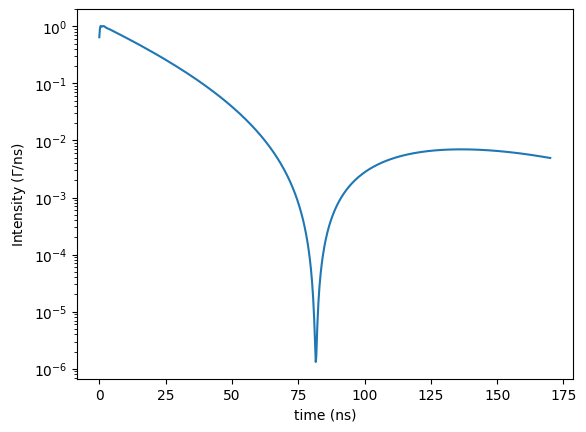

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

iron = nx.Material.Template(nx.lib.material.SS_enriched)

layer_Fe = nx.Layer(id = "Fe layer",
                    material = iron,
                    thickness = 3000)

site = nx.Hyperfine(magnetic_field = 0,
                    isotropic = True)

iron.hyperfine_sites = [site]

sample = nx.Sample(layers = [layer_Fe])

beam = nx.Beam(polarization = 0)

air = nx.Air(2)

exp = nx.Experiment(beam = beam,
                    objects = [air, sample],
                    isotope = nx.lib.moessbauer.Fe57)

# define the time spectrum measurement object
time_spectrum = nx.TimeSpectrum(experiment = exp,
                                time_length = 170,  # in ns
                                time_step = 0.2)    # in ns

# calculate the time spectrum from the object
# a calculation can also be performed by the () operator instead of .Calculate()
# the time spectrum will return the time axis and the intensity
time_axis, intensity = time_spectrum()

plt.semilogy(time_axis, intensity)
plt.xlabel('time (ns)')
plt.ylabel(r'Intensity ($\Gamma$/ns)')
plt.show()

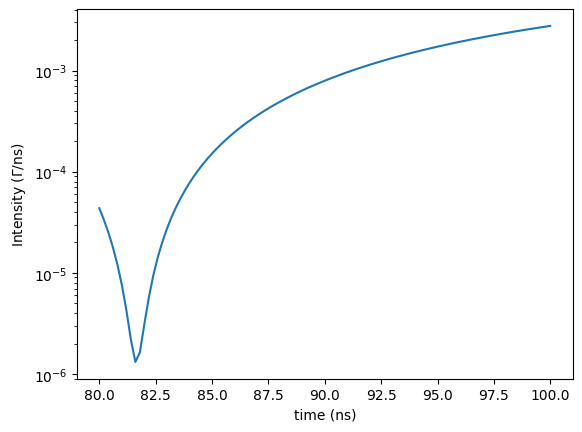

In [2]:
t_m, i_m = nx.Mask(time_axis, intensity, 80, 100)

plt.semilogy(t_m, i_m)
plt.xlabel('time (ns)')
plt.ylabel(r'Intensity ($\Gamma$/ns)')
plt.show()

In [3]:
count_rate = nx.CountRateEstimator(5e9, time_axis, intensity, nx.lib.moessbauer.Fe57, time_start=12, time_end=170, detector_efficiency=0.65, attenuation=0.25)
print(count_rate)

34065.619827558825
